#### Accuracy vs. Temp (and spread) for the perturbed data by individual gas abundances (CO, CH4, NH3, H2O)

In [1]:
import os
import numpy as np
import pandas as pd
import glob
import json
# import sklearn.model_selection as ms
# from sklearn import metrics
# import xgboost as xgb
import matplotlib.pyplot as plt
import time

#### For each removed-species, three different categories in one plot 

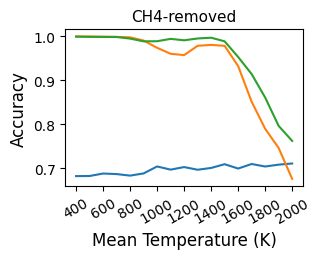

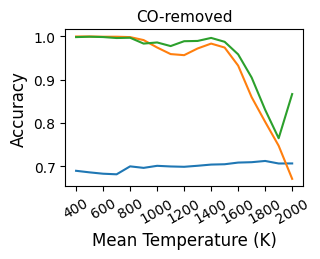

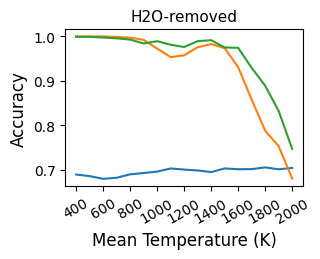

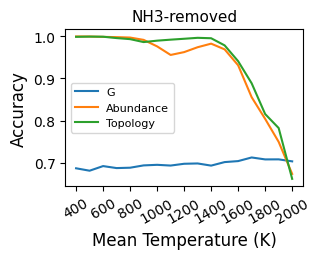

In [3]:
data_dir = "/Users/hkim78/work/HotJupiter/ML/results/perturbed_data/"
dir_plot = "/Users/hkim78/work/HotJupiter/plot/atmosphere-uncertainty/perturbed_data/"

mean_temp = np.arange(400, 2100, 100)

legend_label = {"f1":"G", "f2": "Abundance", "f3":"Topology", "f4":"G + Topology", "f5": "G + Abundance", 
                "f6": "Abundance + Topology", "f7":"G + Abundance + Topology"}

for removed_species in ["CH4", "CO", "H2O", "NH3"]:
    plt.figure(figsize=(3.3, 2.7))

    input_path = data_dir + "accuracy_with_perturbation_%s.json"%removed_species
    with open(input_path) as infile:
        a = json.load(infile)
     
    for i in ["f1", "f2", "f3"]: 
        plt.plot(a[i], label = legend_label[i])
    
    if removed_species == "NH3":
        plt.legend(fontsize=8)

    plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
    plt.yticks(fontsize=10)

    plt.xlabel("Mean Temperature (K)", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title("%s-removed"%(removed_species), fontsize=11)
    plt.tight_layout()

    plt.savefig(dir_plot + "accuracy_perturbed_data_%s_three_groups.png"%removed_species, dpi=200)
    plt.savefig(dir_plot + "accuracy_perturbed_data_%s_three_groups.pdf"%removed_species)
    plt.show()